<a href="https://colab.research.google.com/github/arwendy123/Customer-Churn-Prediction-and-Analysis/blob/main/Customer_Churn_Prediction_in_Telecommunications_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

## 1.) Problem Description

This project aims to develop a predictive model for customer churn in the telecommunications industry. The goal is to accurately identify customers who are likely to discontinue their services. By analyzing various customer-related features, such as call charges and account length, the project aims to build a model that can effectively predict customer churn. This model will help companies proactively identify high-risk customers and implement targeted retention strategies to reduce churn rates and improve business performance.

## 2.) Import relevant Libraries/packages

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import coo_matrix, hstack
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

## 3.) Exploratory Data Analysis

### 3.1) Some High Level Information

In [2]:
# Load data using pandas
data = pd.read_csv('Data Train.csv')

# Display the top 5 rows of data
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
# Display high-level statistical description of numerical features in the 'data' dataset
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


After the data.describe() line, the code provides a high-level statistical description of the numerical features in the dataset. This includes various statistical measures such as count, mean, standard deviation, minimum value, quartiles, and maximum value for each numerical feature. By calling data.describe(), we gain insights into the central tendencies and dispersion of the numerical data, helping us understand the distribution and range of values for each feature. This summary statistics overview allows us to assess the data's general characteristics and identify any potential outliers or irregularities in the dataset.

In [4]:
# Display the dimensions of the dataframe 'data'
data.shape

(4250, 20)

In [5]:
# Calculate the number of churned customers using a filter on the 'churn' column with the value 'yes'
churn_count = data[data['churn'] == 'yes'].churn.count()

# Display the number of churned customers
print("Number of churned customers: ", churn_count)

Number of churned customers:  598


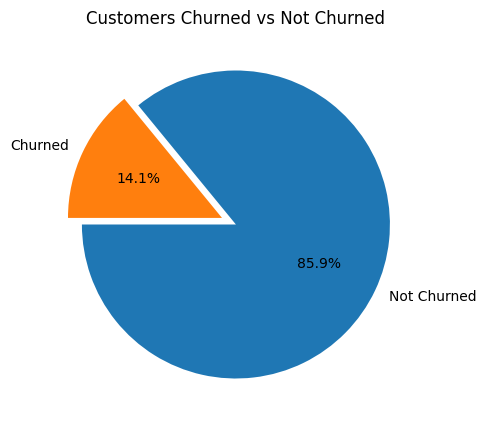

In [6]:
# Calculate the number of customers who did not churn
not_churned = data[data['churn'] == 'no']['churn'].count()

# Calculate the number of customers who churned
churned = data[data['churn'] == 'yes']['churn'].count()

# Create a pie chart to visualize the number of churned and not churned customers
fig = plt.figure(figsize=(5, 5))
plt.pie([not_churned, churned], labels=['Not Churned', 'Churned'], explode=(0, 0.1),\
        autopct="%1.1f%%", startangle=180)
plt.title('Customers Churned vs Not Churned')
plt.show()

The code generates a pie chart to visualize the distribution of churned and not churned customers. It addresses the significant class imbalance issue in the dataset by highlighting the proportion of customers who churned compared to those who did not churn. In this specific example, it is mentioned that only 14.1% of the total samples belong to the churned class. The pie chart provides a visual representation of this class imbalance, allowing for a quick understanding of the data distribution and the need for appropriate handling of class imbalance during the analysis or modeling process.

### 3.2) Distribution of Various Features to Understand Class Separation

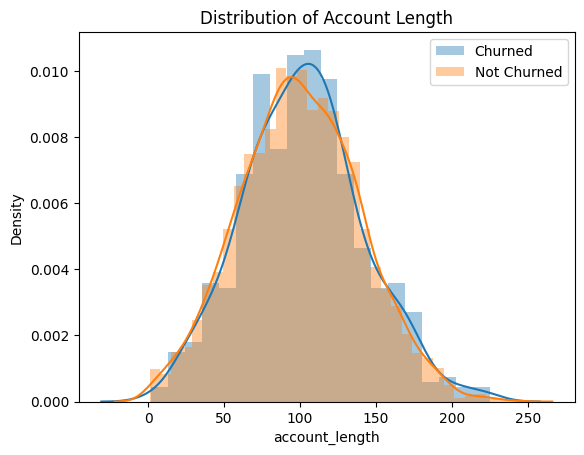

In [7]:
# Select the 'account_length' column from the dataset for both class labels
ac_len_churned = data[data['churn'] == 'yes']['account_length']
ac_len_not_churned = data[data['churn'] == 'no']['account_length']

# Plot the distribution of account length for both class labels using seaborn
sns.distplot(ac_len_churned, label='Churned')
sns.distplot(ac_len_not_churned, label='Not Churned')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

After plotting the distributions using seaborn, it is observed that the distributions of account lengths for churned and not churned customers are nearly overlapping. This suggests that the 'account_length' feature may not be a strong differentiating factor between the two classes. The overlap indicates that there is no significant separation between the churned and not churned customers based on their account lengths.

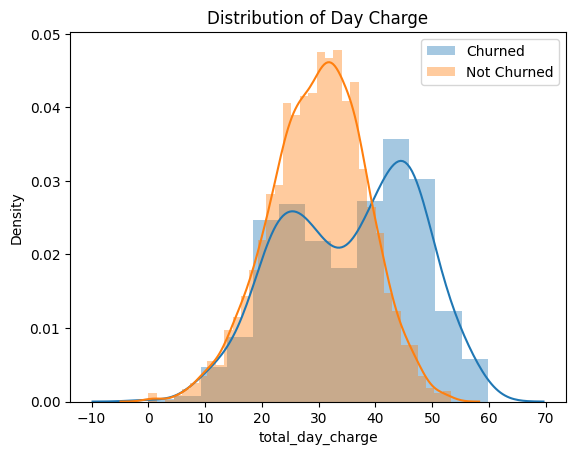

In [8]:
# Select the 'total_day_charge' column from the dataset for both class labels
day_charge_churned = data[data['churn'] == 'yes']['total_day_charge']
day_charge_not_churned = data[data['churn'] == 'no']['total_day_charge']

# Plot the distribution of day charge for both class labels using seaborn
sns.distplot(day_charge_churned, label='Churned')
sns.distplot(day_charge_not_churned, label='Not Churned')
plt.title('Distribution of Day Charge')
plt.legend()
plt.show()

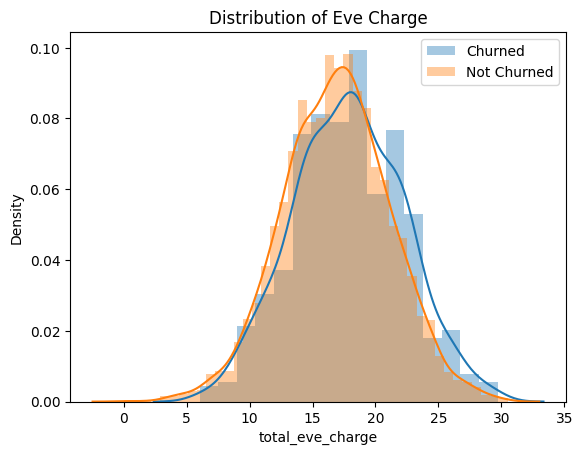

In [9]:
# Select the 'total_eve_charge' column from the dataset for both class labels
eve_charge_churned = data[data['churn'] == 'yes']['total_eve_charge']
eve_charge_not_churned = data[data['churn'] == 'no']['total_eve_charge']

# Plot the distribution of evening charge for both class labels using seaborn
sns.distplot(eve_charge_churned, label='Churned')
sns.distplot(eve_charge_not_churned, label='Not Churned')
plt.title('Distribution of Eve Charge')
plt.legend()
plt.show()

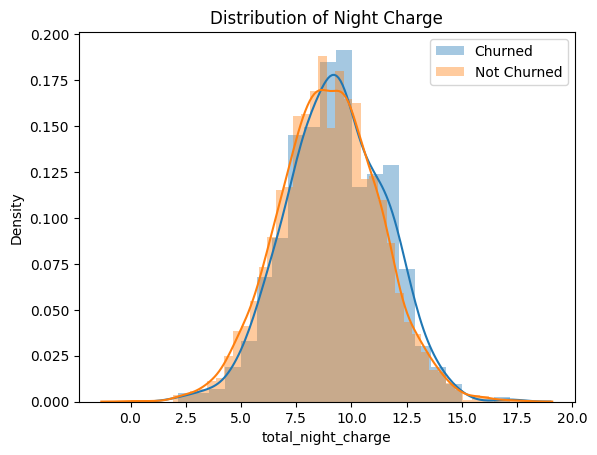

In [10]:
# Select the 'total_night_charge' column from the dataset for both class labels
night_charge_churned = data[data['churn'] == 'yes']['total_night_charge']
night_charge_not_churned = data[data['churn'] == 'no']['total_night_charge']

# Plot the distribution of night charge for both class labels using seaborn
sns.distplot(night_charge_churned, label='Churned')
sns.distplot(night_charge_not_churned, label='Not Churned')
plt.title('Distribution of Night Charge')
plt.legend()
plt.show()

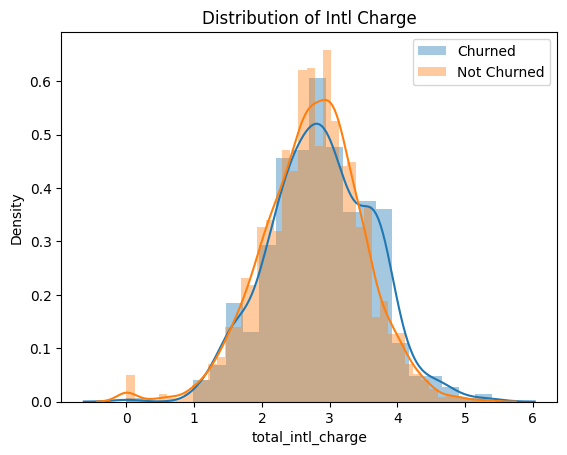

In [11]:
# Select the 'total_intl_charge' column from the dataset for both class labels
intl_charge_churned = data[data['churn'] == 'yes']['total_intl_charge']
intl_charge_not_churned = data[data['churn'] == 'no']['total_intl_charge']

# Plot the distribution of international charge for both class labels using seaborn
sns.distplot(intl_charge_churned, label='Churned')
sns.distplot(intl_charge_not_churned, label='Not Churned')
plt.title('Distribution of Intl Charge')
plt.legend()
plt.show()

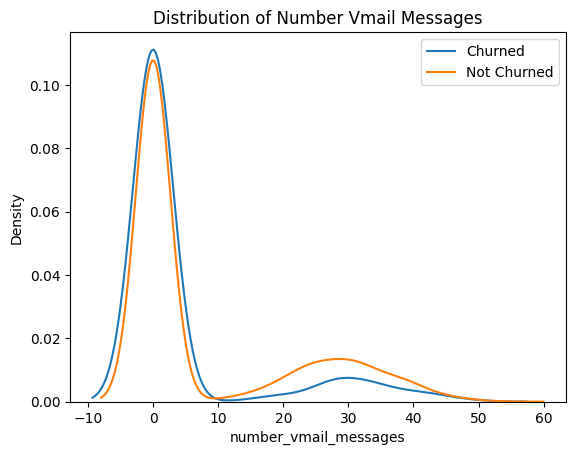

In [12]:
# Select the 'number_vmail_messages' column from the dataset for both class labels
vmail_msgs_churned = data[data['churn'] == 'yes']['number_vmail_messages']
vmail_msgs_not_churned = data[data['churn'] == 'no']['number_vmail_messages']

# Plot the distribution of number of voicemail messages for both class labels using seaborn
sns.distplot(vmail_msgs_churned, hist=False, label='Churned')
sns.distplot(vmail_msgs_not_churned, hist=False, label='Not Churned')
plt.title('Distribution of Number Vmail Messages')
plt.legend()
plt.show()

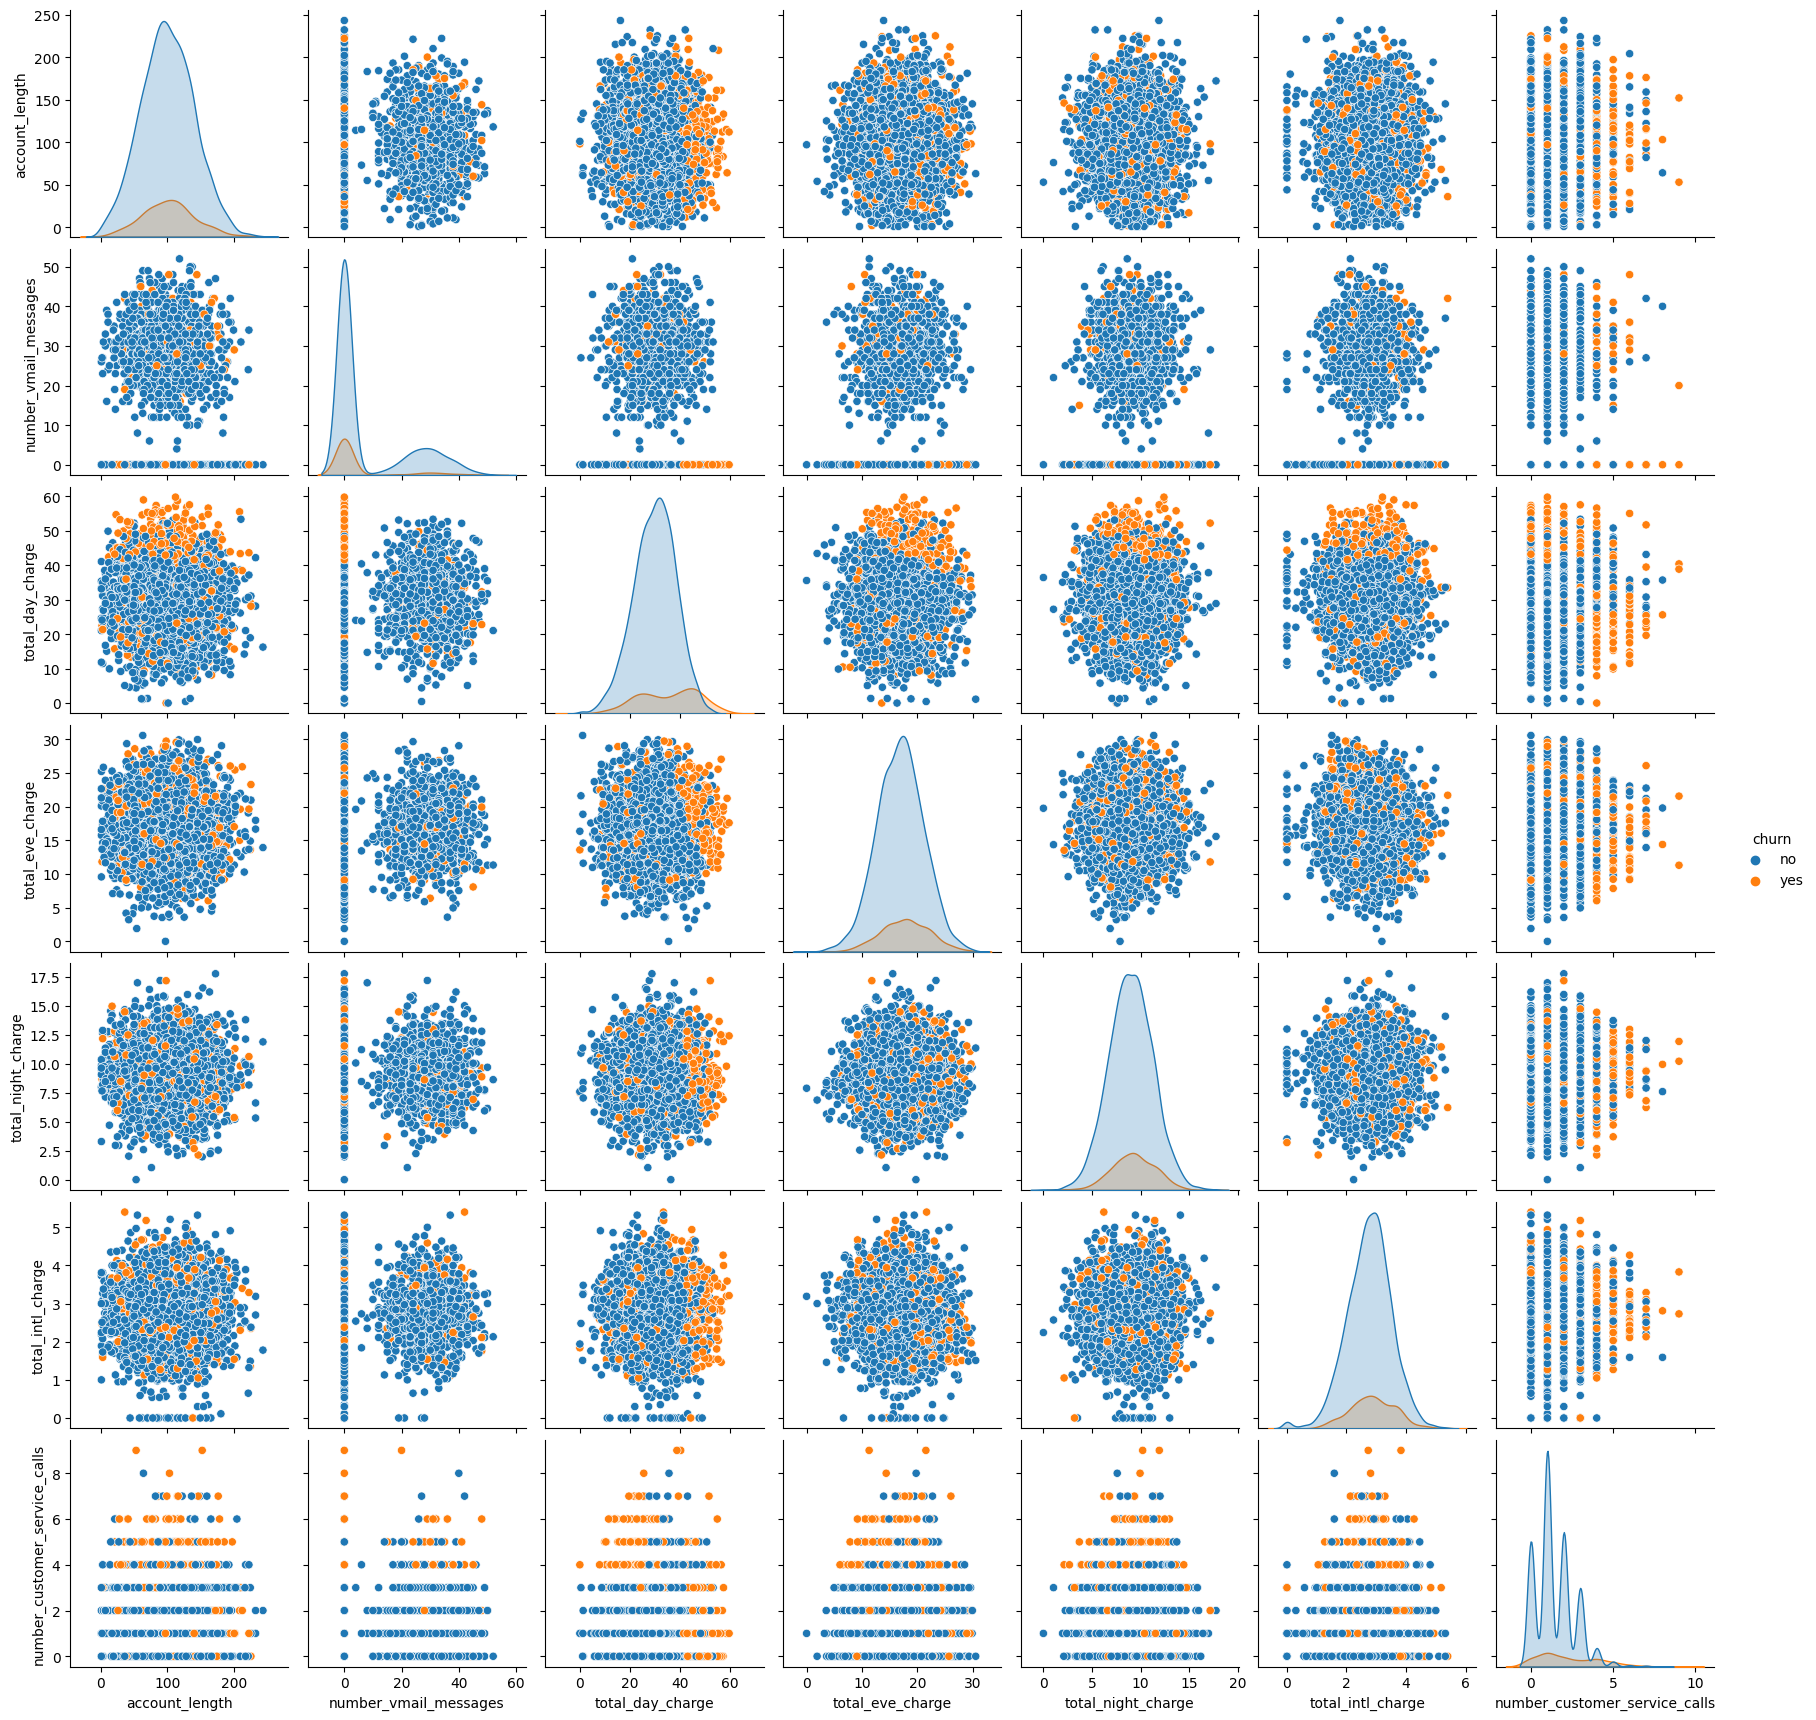

In [13]:
# Create pairplots for selected features in the dataset, separating them based on churned and not churned class labels
sns.pairplot(data, vars=['account_length', 'number_vmail_messages', 'total_day_charge',\
                         'total_eve_charge', 'total_night_charge', 'total_intl_charge',\
                         'number_customer_service_calls'], hue='churn')
plt.show()


After plotting the distributions using seaborn, it is observed that the distributions of account lengths for churned and not churned customers are nearly overlapping. This suggests that the 'account_length' feature may not be a strong differentiating factor between the two classes. The overlap indicates that there is no significant separation between the churned and not churned customers based on their account lengths.

Understanding the distribution of account lengths is crucial as it helps us determine if this feature contributes to customer churn prediction. In this case, based on the visual analysis, we can conclude that the account length alone may not be a reliable indicator of customer churn.

### 3.3) Correlation Matrix:

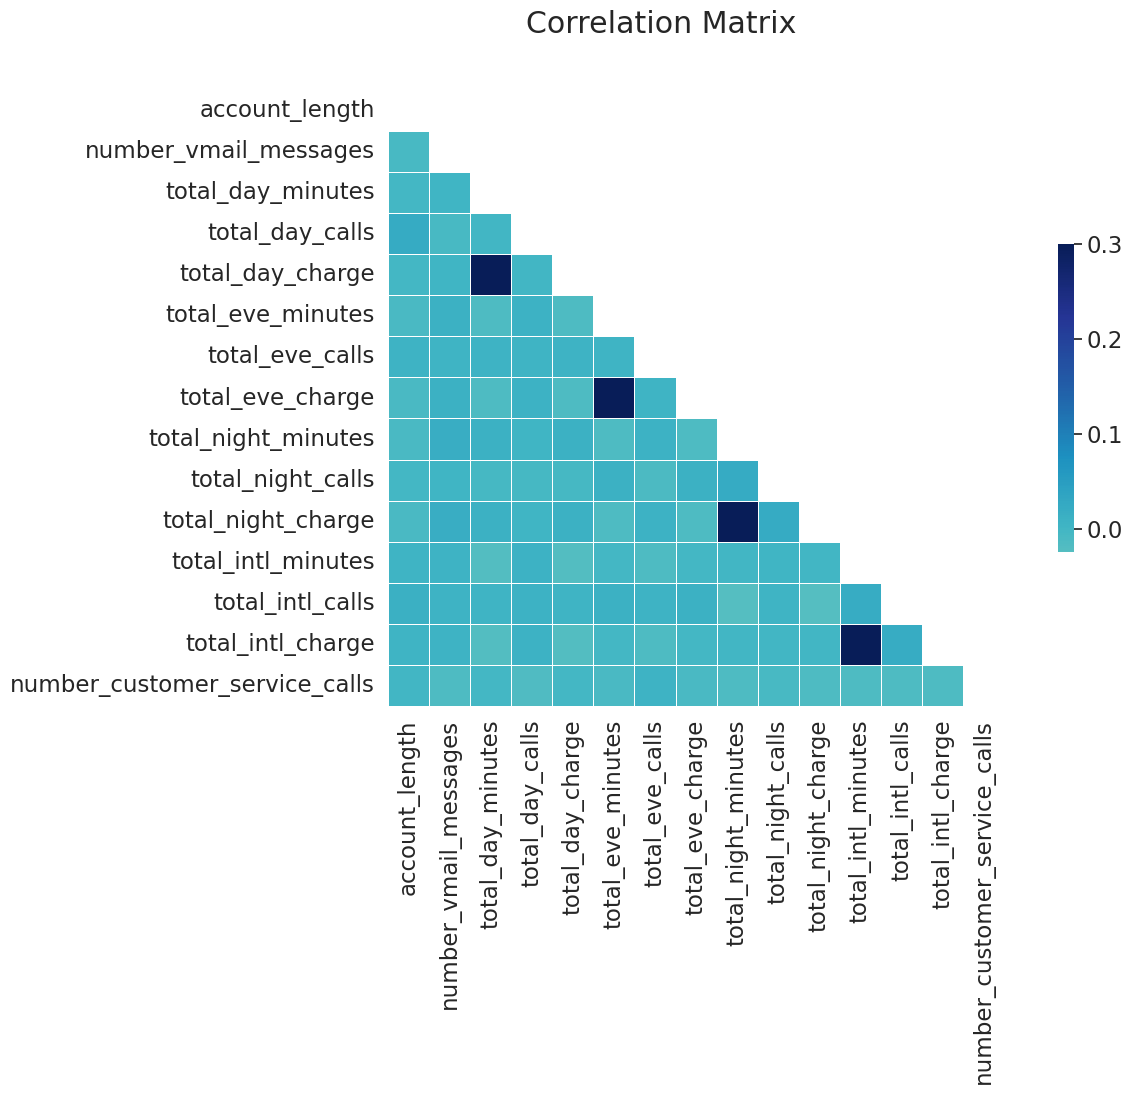

In [14]:
# Set style and font size for the heatmap plot
sns.set(style="white", font_scale=1.5)

# Create correlation matrix and set the mask
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create heatmap plot
f, ax = plt.subplots(figsize=(14, 8))
f.suptitle('Correlation Matrix')
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0, square=True,\
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Yang berkorelasi tinggi:
- total_day_minutes, total_day_charge
- total_eve_minutes, total_eve_charge
- total_night_minutes, total_night_charge
- total_intl_minutes, total_intl_charge

In [15]:
# Remove highly correlated features
data = data.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], axis=1)

## 4.) Train test split

In [16]:
# Convert class label from 'yes' and 'no' to numeric values 1 and 0
data.churn.replace(['yes', 'no'], [1, 0], inplace=True)

In [17]:
# Separate target variable from training features
Y = data['churn']
X = data.drop('churn', axis=1)

In [18]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=11)

# Display the shapes of the training and testing sets
print("Dimension of numerical features on the normalized train data: ", x_train.shape)
print("Dimension of numerical features on the normalized test data: ", x_test.shape)

Dimension of numerical features on the normalized train data:  (3825, 15)
Dimension of numerical features on the normalized test data:  (425, 15)


## 5.) Featurisation

### 5.1) State

In [19]:
# Convert categorical feature 'state' to numeric using CountVectorizer
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Convert 'state' feature in the training data to numeric feature
train_state = vectorizer.fit_transform(x_train['state'].values)

# Convert 'state' feature in the test data to numeric feature
test_state = vectorizer.transform(x_test['state'].values)

In [20]:
# Store the feature names in a list for later use
state_fea = vectorizer.get_feature_names_out()

# Display feature names
print("Feature names: ", state_fea)

Feature names:  ['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [21]:
# Display the dimensions of the new state feature created by CountVectorizer
print("Shape of the new state feature: ", train_state.shape)

Shape of the new state feature:  (3825, 51)


### 5.2) Area Code

In [22]:
# Featurize the categorical feature 'area_code'
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Convert categorical values to vectors in the training data and test data
train_area_code = vectorizer.fit_transform(x_train['area_code'].values)
test_area_code = vectorizer.transform(x_test['area_code'].values)


In [23]:
# Store the feature names in a list for later use
area_code_fea = vectorizer.get_feature_names_out()

# Display feature names
print("Feature names: ", area_code_fea)

Feature names:  ['area_code_408' 'area_code_415' 'area_code_510']


In [24]:
# Display the dimensions of the new area_code feature created by CountVectorizer
print("Dimensions of the new area_code feature: ", train_area_code.shape)

Dimensions of the new area_code feature:  (3825, 3)


### 5.3) International_plan

In [25]:
# Featurize the categorical feature 'international_plan'
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Convert categorical values to vectors in the training data and test data
train_international_plan = vectorizer.fit_transform(x_train['international_plan'].values)
test_international_plan = vectorizer.transform(x_test['international_plan'].values)

# Display the feature names from CountVectorizer
print(vectorizer.get_feature_names_out())

['no' 'yes']


In [26]:
# Store the feature names in a list for later use
intnl_fea = ['intl_plan_no', 'intl_plan_yes']

# Display feature names
print("Feature names: ", intnl_fea)

Feature names:  ['intl_plan_no', 'intl_plan_yes']


In [27]:
# Display the dimensions of the new international_plan feature created by CountVectorizer
print("Dimensions of the new international_plan feature: ", train_international_plan.shape)

Dimensions of the new international_plan feature:  (3825, 2)


### 5.4) voice_mail_plan

In [28]:
# Featurize the categorical feature 'voice_mail_plan'
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Convert categorical values to vectors in the training data and test data
train_voice_mail_plan = vectorizer.fit_transform(x_train['voice_mail_plan'].values)
test_voice_mail_plan = vectorizer.transform(x_test['voice_mail_plan'].values)

# Display the feature names from CountVectorizer
print(vectorizer.get_feature_names_out())

['no' 'yes']


In [29]:
# Store the feature names in a list for later use
voice_mail_plan_fea = ['voice_plan_no', 'voice_plan_yes']

# Display feature names
print("Feature names: ", voice_mail_plan_fea)

Feature names:  ['voice_plan_no', 'voice_plan_yes']


In [30]:
# Display the dimensions of the new voice_mail_plan feature created by CountVectorizer
print("Dimensions of the new voice_mail_plan feature: ", train_voice_mail_plan.shape)

Dimensions of the new voice_mail_plan feature:  (3825, 2)


### 5.5) Numerical features

In [31]:
# Select the numerical features that need to be collected separately
numerical_fea = ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_day_charge',
                 'total_eve_calls', 'total_eve_charge', 'total_night_calls', 'total_night_charge',
                 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

# Collect numerical features from the training data
train_numerical = x_train[numerical_fea]

# Collect numerical features from the test data
test_numerical = x_test[numerical_fea]

In [32]:
# Create StandardScaler object
scaler = StandardScaler()

# Normalize the numerical data in the training and test data
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.fit_transform(test_numerical)

In [33]:
# Display the dimensions of the normalized numerical features in the training data
print("Dimensions of the normalized numerical features in the training data: ", train_numerical_scaled.shape)

# Display the dimensions of the normalized numerical features in the test data
print("Dimensions of the normalized numerical features in the test data: ", test_numerical_scaled.shape)

Dimensions of the normalized numerical features in the training data:  (3825, 11)
Dimensions of the normalized numerical features in the test data:  (425, 11)


### 5.6) Merge Features

In [34]:
# Merge the features in the training data into a single dataset
x_train_merged = hstack((train_numerical_scaled, train_voice_mail_plan, train_international_plan,
                         train_area_code, train_state))

# Merge the features in the test data into a single dataset
x_test_merged = hstack((test_numerical_scaled, test_voice_mail_plan, test_international_plan,
                        test_area_code, test_state))

In [35]:
# Print the dimensions of the final train data after merging
print("Dimensions of the final train data: ", x_train_merged.shape)

# Print the dimensions of the final test data after merging
print("Dimensions of the final test data: ", x_test_merged.shape)

Dimensions of the final train data:  (3825, 69)
Dimensions of the final test data:  (425, 69)


In [36]:
# Create a list of all features in the correct order
all_features = numerical_fea + voice_mail_plan_fea + intnl_fea + area_code_fea.tolist() + state_fea.tolist()

## 6). Models

### 6.1) XgBoost Classifier

In [37]:
# Create the 'scale_pos_weight' parameter to balance the classes in XGBoost
import math

# Calculate the ratio of the majority class to the minority class
# Round it to 2 decimal places and store it in the 'scale' variable
scale = round(math.sqrt(y_train.value_counts()[0] / y_train.value_counts()[1]), 2)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------------------------------------------------------------------------------------------------


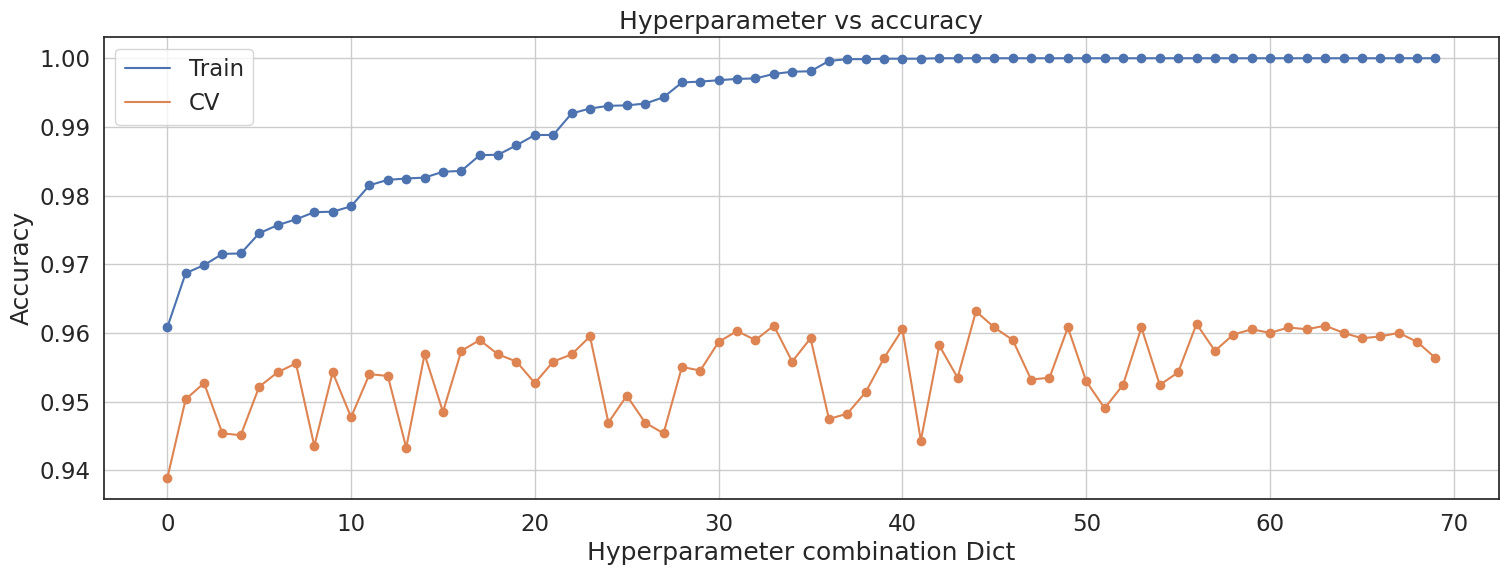

In [38]:
# Define the hyperparameters to be searched
parameters = {
    "learning_rate": [0.10, 0.20, 0.30],
    "max_depth": [3, 5, 10, 20],
    "n_estimators": [100, 200, 300, 500],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

# Initialize the XGBClassifier with the 'scale_pos_weight' and 'eval_metric' parameters
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric='mlogloss')

# Create a GridSearchCV object with the specified estimator, parameter grid, scoring metric,
# return_train_score=True to access the train score, and verbose=1
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters, scoring='accuracy',
                    return_train_score=True, verbose=1)

# Fit the GridSearchCV on the training data
grid.fit(x_train_merged, y_train)

print("-----" * 20)

# Create a dataframe from the sorted GridSearchCV results based on mean_train_score in ascending order
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score', ascending=True)[:70]

# Get the parameter list from the GridSearchCV results
param_list = list(cv_result['params'])

# Create an index range for scatter plot
param_index = np.arange(70)

# Plot the scatter plot of mean_train_score and mean_test_score
plt.figure(figsize=(18, 6))
plt.scatter(param_index, cv_result['mean_train_score'])
plt.plot(param_index, cv_result['mean_train_score'], label='Train')
plt.scatter(param_index, cv_result['mean_test_score'])
plt.plot(param_index, cv_result['mean_test_score'], label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparameter combination Dict')
plt.ylabel('Accuracy')
plt.show()


In [39]:
# Manually select the best parameters by observing to achieve the best balance between bias and variance.
# The best_parameters will be used to build the optimal XGBoost model
best_parameters = param_list[34]

print(best_parameters)

{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [40]:
# Train the model using the optimal parameters found

# Initialize XGBClassifier model with the optimal parameters
clf_xgb = XGBClassifier(learning_rate=best_parameters['learning_rate'],
                        max_depth=best_parameters['max_depth'],
                        n_estimators=best_parameters['n_estimators'],
                        colsample_bytree=best_parameters['colsample_bytree'],
                        eval_metric='mlogloss', scale_pos_weight=scale)

# Train the model on the training data
clf_xgb.fit(x_train_merged, y_train)

# Calculate accuracy and recall score for training and testing data
result1 = ["1.", "XGBClassifier", "Balanced using scale_pos_weight"]

# Calculate accuracy on training data
y_pred_tr = clf_xgb.predict(x_train_merged)
result1.append(round(accuracy_score(y_train, y_pred_tr), 2))
print('Train accuracy XGB: ', result1[3])

# Calculate accuracy on testing data
y_pred_test = clf_xgb.predict(x_test_merged)
result1.append(round(accuracy_score(y_test, y_pred_test), 2))
print('Test accuracy XGB: ', result1[4])

# Calculate recall score on testing data
recall = recall_score(y_test, y_pred_test)
result1.append(round(recall, 2))
print("Recall Score: ", result1[5])

Train accuracy XGB:  1.0
Test accuracy XGB:  0.95
Recall Score:  0.73


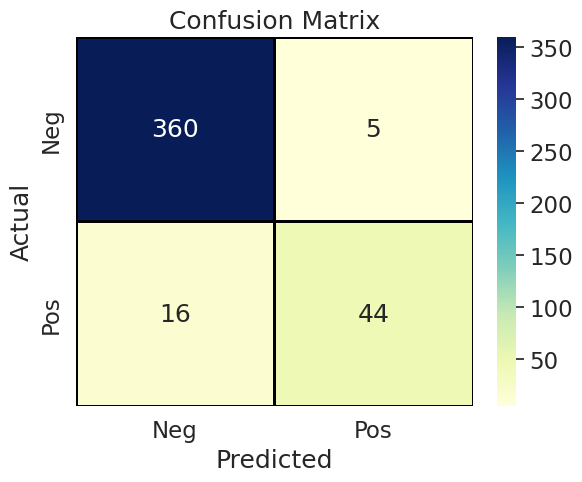

In [41]:
# Calculate confusion matrix using sklearn
cm = confusion_matrix(y_test, y_pred_test)

# Create a heatmap of the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu', ax=ax)

# Set x and y axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg', 'Pos'])
ax.yaxis.set_ticklabels(['Neg', 'Pos'])

# Display the plot
plt.show()

Based on the confusion matrix, the XGBoost model trained with the scale_pos_weight parameter achieved a recall of 73% and a testing accuracy of 95%.

A recall of 73% means that the model successfully identified and classified 73% of the actual positive churn cases correctly. This indicates that the model is able to effectively detect customers who are likely to churn.

The testing accuracy of 95% indicates that the model accurately predicted the churn or non-churn status of 95% of the customers in the test dataset. This high accuracy suggests that the model is performing well in distinguishing between churned and non-churned customers.

Overall, these results indicate that the XGBoost model with scale_pos_weight is effective in identifying churned customers and achieving a high level of accuracy in predicting customer churn.

### 6.2) Random Forest Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------------------------------------------------------------------------------------------------


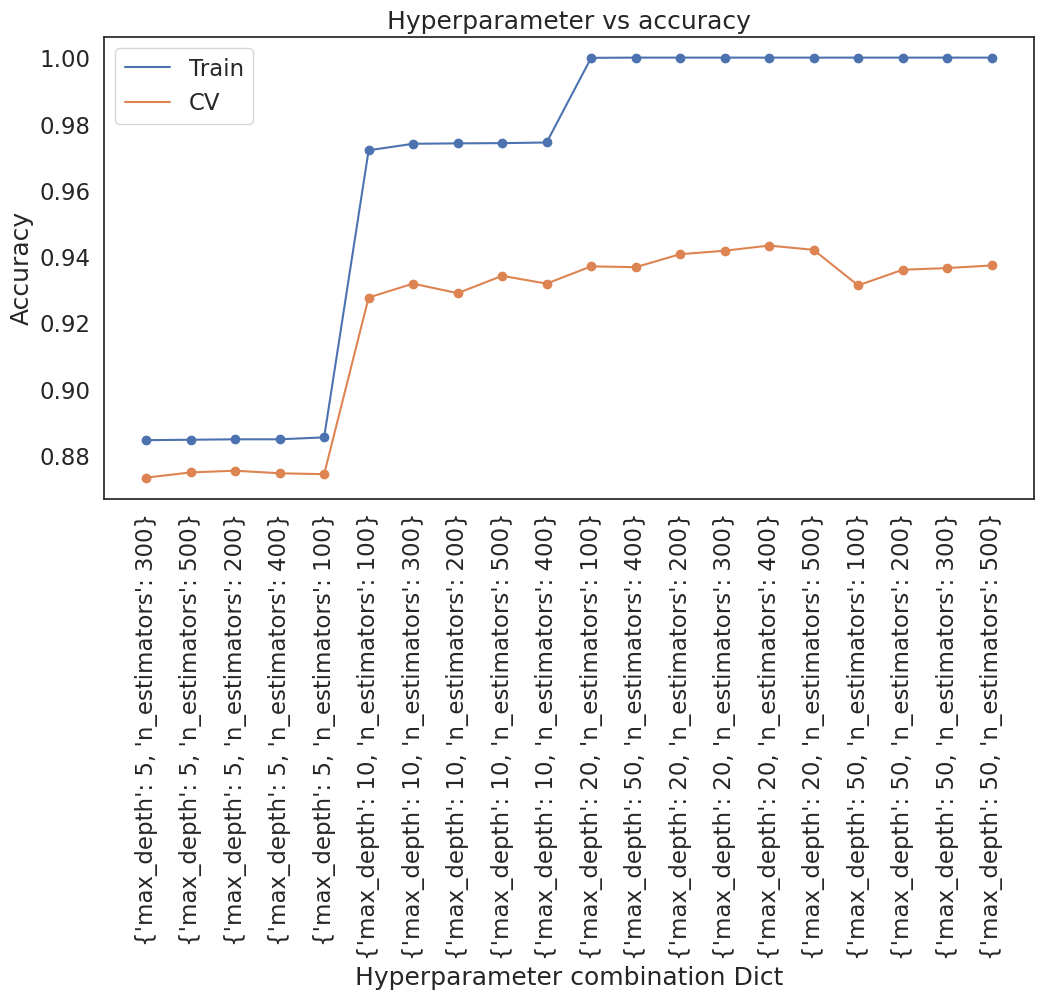

In [42]:
# Perform grid search to find the best hyperparameter combination

parameters = {'max_depth': [5, 10, 20, 50], 'n_estimators': [100, 200, 300, 400, 500]}
clf_rf = RandomForestClassifier(class_weight='balanced', random_state=43)
grid = GridSearchCV(estimator=clf_rf, param_grid=parameters, scoring='accuracy',
                    return_train_score=True, verbose=1)
grid.fit(x_train_merged, y_train)

print("-----" * 20)

# Create a dataframe from the grid search results and sort them based on mean_train_score
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score', ascending=True)
params = list(cv_result['params'].astype(str))

# Visualize the grid search results using scatter plot and lines
plt.figure(figsize=(12, 6))
plt.scatter(params, cv_result['mean_train_score'])
plt.plot(params, cv_result['mean_train_score'], label='Train')
plt.scatter(params, cv_result['mean_test_score'])
plt.plot(params, cv_result['mean_test_score'], label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('Hyperparameter combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [43]:
# Initialize the best parameters for the random forest model
# The best parameters are manually selected by observing to achieve the best balance between bias and variance.
best_max_depth = 10
best_n_estimator = 300

In [44]:
# Initialize RandomForestClassifier with the optimal parameters
clf_rf = RandomForestClassifier(max_depth=best_max_depth, n_estimators=best_n_estimator,
                                class_weight='balanced', random_state=43)

# Train the model on the training data
clf_rf.fit(x_train_merged, y_train)

# Calculate accuracy and recall score for training and testing data
result2 = ["2.", "RF", "Balanced using class weights"]

# Calculate accuracy on training data
y_pred_tr = clf_rf.predict(x_train_merged)
train_accuracy = round(accuracy_score(y_train, y_pred_tr), 2)
result2.append(train_accuracy)
print("Train accuracy RF:", train_accuracy)

# Calculate accuracy on testing data
y_pred_test = clf_rf.predict(x_test_merged)
test_accuracy = round(accuracy_score(y_test, y_pred_test), 2)
result2.append(test_accuracy)
print("Test accuracy RF:", test_accuracy)

# Calculate recall score on testing data
recall = recall_score(y_test, y_pred_test)
result2.append(round(recall, 2))
print("Recall Score:", result2[5])

Train accuracy RF: 0.97
Test accuracy RF: 0.91
Recall Score: 0.72


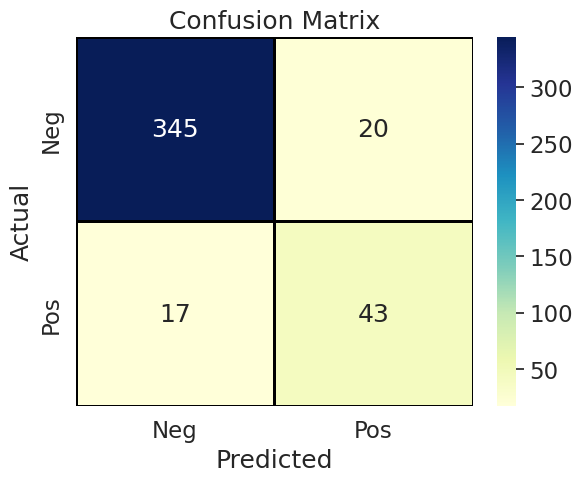

In [45]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create heatmap
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu', ax=ax)

# Set x and y axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set y axis limit to avoid flipping
ax.set_ylim(2.0, 0)

# Set plot title
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axis
ax.xaxis.set_ticklabels(['Neg', 'Pos'])
ax.yaxis.set_ticklabels(['Neg', 'Pos'])

# Display the plot
plt.show()

The Random Forest Classifier achieved a training accuracy of 97%, indicating that the model accurately predicted the churn or non-churn status of 97% of the customers in the training dataset. This suggests that the model is performing well in terms of fitting the training data.

For the testing accuracy, the Random Forest Classifier achieved a value of 91%, indicating that the model accurately predicted the churn or non-churn status of 91% of the customers in the test dataset. This suggests that the model is performing well in making predictions on unseen data.

The recall score of 0.72 indicates that the model successfully identified and classified 72% of the actual positive churn cases correctly. This means that the model has a moderate ability to detect customers who are likely to churn.

Overall, the Random Forest Classifier demonstrates a good level of accuracy on both the training and test datasets, with a slightly lower performance in recall. This indicates that the model is effective in predicting customer churn, but there is still room for improvement in identifying all potential churned customers.

### Feature importance

In [46]:
# Calculate feature importance using Random Forest Classifier
importance = clf_rf.feature_importances_

# Create a DataFrame to store the feature importance results
fea_imp_df = pd.DataFrame({"allfeatures": all_features, "importance": list(importance)})

# Sort the feature importance in ascending order
fea_imp_df.sort_values('importance', inplace=True)

<Axes: ylabel='allfeatures'>

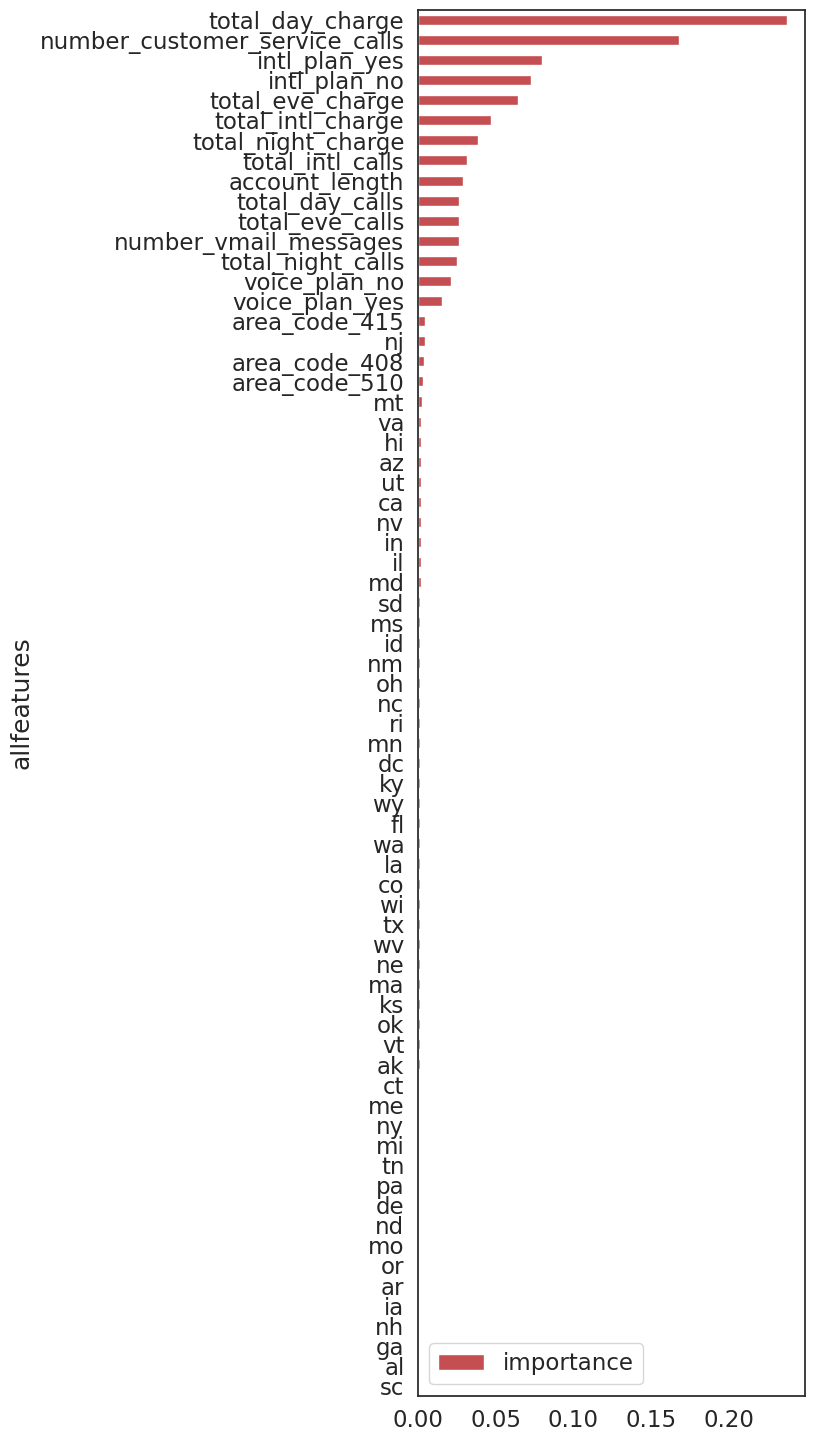

In [47]:
# Visualize the feature importance using a bar plot
fea_imp_df.plot(kind='barh', y='importance', x='allfeatures', color='r', figsize=(5, 18))

The feature "total_day_charge" represents the total charge for daytime calls, while "number_customer_service_calls" represents the number of customer service calls made by a customer. These two features have been identified as important factors in predicting customer churn.

The "total_day_charge" feature indicates the financial impact of daytime calls on customers. Higher charges may indicate increased usage or dissatisfaction with the service, potentially leading to customer churn. Monitoring and managing these charges can help identify and address issues that may contribute to customer attrition.

On the other hand, "number_customer_service_calls" reflects the level of interaction and engagement between customers and the customer service department. A higher number of calls may suggest that customers are experiencing problems or seeking assistance, which could potentially lead to dissatisfaction and churn. By monitoring and addressing customer service calls, companies can proactively address customer concerns and improve retention.

Identifying these features as important highlights their significance in understanding and predicting customer churn. By focusing on managing daytime charges and providing efficient customer service, businesses can work towards reducing churn and improving customer satisfaction and loyalty.